# Topic 7: Data Manipulation with Pandas


## DataFrame
$\bullet$ Pandas (Panel data) is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. <br>
$\bullet$ Pandas is well suited for many different kinds of data: <br>
$\bullet$ Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet<br>
    $\bullet$ Time series data (not necessarily fixed-frequency) . <br>
    $\bullet$ Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels<br>
    $\bullet$ Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure <br>

<img src="pandas-data-structure.svg" width=500>

<img src="Fig-example.png" width=500>

### 1.1 Construction
pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)<br>
<hr width="80%" align="left">

$\bullet$ data: numpy ndarray (structured or homogeneous), dict, or DataFrame. Dict can contain Series, arrays, constants, or list-like objects.<br>
$\bullet$ index: array-like or Index, i.e. rows index <br>
$\bullet$ columns: array-like or Index <br>
$\bullet$ dtype: numpy.dtype or None <br>
$\bullet$ copy: Copy data from inputs 


#### 1.1.1 From Incompletely-indexed Data
<p>$\bullet$ Data is an ndarray(2D) or list(2D)  <br>

$\bullet$ If index/columns is passed, its length must be the same as the size of row/columns of data <br>
$\bullet$ If no index/columns is passed, one will be automatically created having values [0, ..., data.shape[0] - 1/data.shape[1] -1]
</p>

##### 1.1.1.1 Data with no row index, no column index

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = np.random.rand(6, 4)
data

array([[0.30880801, 0.38687778, 0.22136292, 0.89222862],
       [0.11283627, 0.36596922, 0.87770792, 0.69735349],
       [0.74114113, 0.24463734, 0.57394899, 0.1636651 ],
       [0.12525304, 0.97726703, 0.514685  , 0.15588078],
       [0.71344714, 0.45951784, 0.19539834, 0.12355701],
       [0.17154828, 0.7647852 , 0.94017484, 0.49548888]])

In [4]:
idx = pd.date_range('2020-1-1', periods=6, freq='W' )
col = ['APPL', 'Baidu', 'Cisco', 'Dell']

df = pd.DataFrame(data, index= idx, columns=col)
df

,APPL,Baidu,Cisco,Dell
2020-01-05,0.308808,0.386878,0.221363,0.892229
2020-01-12,0.112836,0.365969,0.877708,0.697353
2020-01-19,0.741141,0.244637,0.573949,0.163665
2020-01-26,0.125253,0.977267,0.514685,0.155881
2020-02-02,0.713447,0.459518,0.195398,0.123557
2020-02-09,0.171548,0.764785,0.940175,0.495489


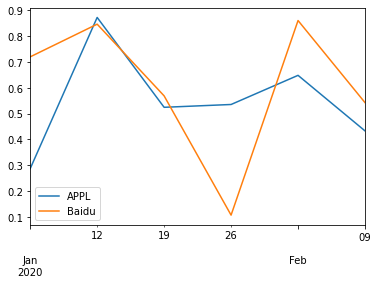

In [6]:
df[['APPL', 'Baidu']].plot()

In [8]:
type(df)

pandas.core.frame.DataFrame

In [7]:
dic = {'APPL': data[:,0], 'Baidu':data[:, 1], 'Cisco': data[:,2], 'Dell': data[:,3]}
dfd = pd.DataFrame(dic, index=idx)
dfd

,APPL,Baidu,Cisco,Dell
2020-01-05,0.286888,0.719851,0.769192,0.610903
2020-01-12,0.872493,0.846473,0.714521,0.651251
2020-01-19,0.524388,0.568640,0.977051,0.257799
2020-01-26,0.535300,0.106744,0.515532,0.427504
2020-02-02,0.648205,0.860550,0.854923,0.094557
2020-02-09,0.433061,0.542603,0.165324,0.124420


In [5]:
ls = [{'APPL': 0.46, 'Baidu': 0.14, 'Cisco': 0.93, 'Dell':0.61}, 
     {'APPL': 0.28, 'Baidu': 0.74, 'Cisco': 0.32, 'Dell':0.30}
     ]
idx0 = idx[:2]
dfl = pd.DataFrame(ls, index=idx0)
dfl

,APPL,Baidu,Cisco,Dell
2020-01-05,0.46,0.14,0.93,0.61
2020-01-12,0.28,0.74,0.32,0.30


In [9]:
data[:,0]

array([0.46015327, 0.28813619, 0.97840302, 0.32850192, 0.62920584,
       0.76105488])

In [8]:
idx

DatetimeIndex(['2020-01-05', '2020-01-12', '2020-01-19', '2020-01-26',
               '2020-02-02', '2020-02-09'],
              dtype='datetime64[ns]', freq='W-SUN')

In [4]:
help(pd.date_range)

Help on function date_range in module pandas.core.indexes.datetimes:

date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None, **kwargs) -> pandas.core.indexes.datetimes.DatetimeIndex
    Return a fixed frequency DatetimeIndex.
    
    Parameters
    ----------
    start : str or datetime-like, optional
        Left bound for generating dates.
    end : str or datetime-like, optional
        Right bound for generating dates.
    periods : int, optional
        Number of periods to generate.
    freq : str or DateOffset, default 'D'
        Frequency strings can have multiples, e.g. '5H'. See
        :ref:`here <timeseries.offset_aliases>` for a list of
        frequency aliases.
    tz : str or tzinfo, optional
        Time zone name for returning localized DatetimeIndex, for example
        'Asia/Hong_Kong'. By default, the resulting DatetimeIndex is
        timezone-naive.
    normalize : bool, default False
        Normalize start/

In [8]:
import numpy as np
import pandas as pd

d = np.random.rand(5,3) #2D ndarray     
index0 = ['a', 'b', 'c', 'd', 'e']
column0 = ['CN', 'US', 'UK']
# data has no row index and column index
df0 = pd.DataFrame(d, index=index0, columns=column0)
df0

,CN,US,UK
a,0.935360,0.108170,0.490306
b,0.823596,0.025467,0.790322
c,0.904552,0.958125,0.719082
d,0.803338,0.348847,0.302820
e,0.708648,0.831737,0.377081


In [5]:
d

array([[0.09526022, 0.11777083, 0.80027119],
       [0.783368  , 0.21185401, 0.67427463],
       [0.43297806, 0.05893917, 0.59189493],
       [0.22652411, 0.15703483, 0.1351754 ],
       [0.21344939, 0.68458956, 0.58854457]])

In [5]:
# index and column are set by default
df1 = pd.DataFrame(d)
df1

,0,1,2
0,0.326282,0.796438,0.681584
1,0.277838,0.229051,0.437687
2,0.954561,0.188923,0.604853
3,0.482034,0.339896,0.312927
4,0.484001,0.778562,0.510839


##### 1.1.1.2 Data with no row index, but column index

In [6]:
df.shape

(6, 4)

In [10]:
d2 = {'CN': np.random.rand(5), 'US':[1,2,3,4,5], 'UK':np.random.rand(5)}
index2 = list('abcde')
# from dict of list
df2 = pd.DataFrame(d2, index=index2)
df2

,CN,US,UK
a,0.284898,1,0.306128
b,0.735068,2,0.754415
c,0.089922,3,0.289188
d,0.516249,4,0.482910
e,0.437846,5,0.706725


In [9]:
d2_2 = [{'CN': 10, 'US':20, 'UK':30}, {'CN': 11, 'US':21}, {'CN': 12, 'US':22, 'UK':32}]
index2_2 = list('abc')
# from list of dict
df2_2 = pd.DataFrame(d2_2, index=index2_2)
df2_2

,CN,US,UK
a,10,20,30.0
b,11,21,NaN
c,12,22,32.0


#### 1.1.2 From Completely-indexed Data

In [8]:
d3 = {'CN':{'a':10, 'b':11, 'c':12}, 'UK':{'a':30, 'c':32}, 
      'US':{'a':20, 'b':21, 'c':22}}
df3 = pd.DataFrame(d3)
df3

,CN,UK,US
a,10,30.0,20
b,11,NaN,21
c,12,32.0,22


#### 1.1.3 From Files

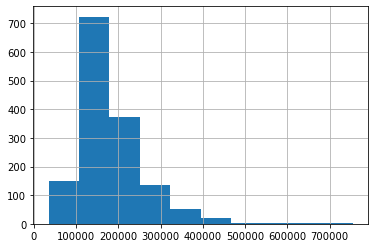

In [11]:
filepath = 'houseprice.csv'
df = pd.read_csv(filepath)
df.SalePrice.hist()

In [8]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file in

In [12]:
df.shape

(1460, 81)

In [13]:
df.index

RangeIndex(start=0, stop=1460, step=1)

In [14]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [19]:
df.values

array([[1, 60, 'RL', ..., 'WD', 'Normal', 208500],
       [2, 20, 'RL', ..., 'WD', 'Normal', 181500],
       [3, 60, 'RL', ..., 'WD', 'Normal', 223500],
       ...,
       [1458, 70, 'RL', ..., 'WD', 'Normal', 266500],
       [1459, 20, 'RL', ..., 'WD', 'Normal', 142125],
       [1460, 20, 'RL', ..., 'WD', 'Normal', 147500]], dtype=object)

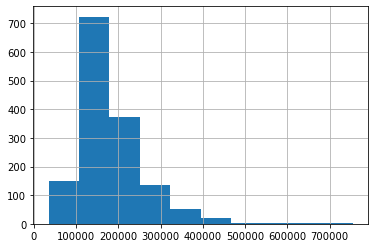

In [20]:
df['SalePrice'].hist()

$\triangleright$ .csv file
pd.read_csv(filepath_or_buffer, sep=',', header='infer', names=None,index_col=None, encoding=None ) 
<hr align="left">

$\bullet$ filepath_or_buffer: file path and name <br>
$\bullet$ sep: Delimiter to use <br>
$\bullet$ header: Row number(s) to use as the column names, and the start of the data.<br>
$\bullet$ names: List of column names to use <br>
$\bullet$ index_col: Column to use as the row labels of the DataFrame <br>
$\bullet$ encoding: Encoding to use for UTF when reading/writing (ex. ‘utf-8’). 
</p>

In [46]:
df = pd.read_csv('houseprice.csv')

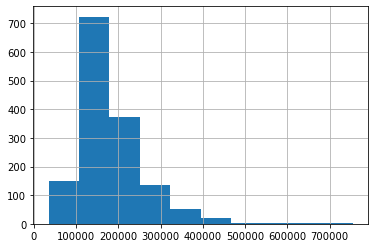

In [47]:
df['SalePrice'].hist()

In [16]:
df.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [13]:
df.shape

(1460, 81)

In [14]:
df.index

RangeIndex(start=0, stop=1460, step=1)

In [15]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [16]:
df.values

array([[1, 60, 'RL', ..., 'WD', 'Normal', 208500],
       [2, 20, 'RL', ..., 'WD', 'Normal', 181500],
       [3, 60, 'RL', ..., 'WD', 'Normal', 223500],
       ...,
       [1458, 70, 'RL', ..., 'WD', 'Normal', 266500],
       [1459, 20, 'RL', ..., 'WD', 'Normal', 142125],
       [1460, 20, 'RL', ..., 'WD', 'Normal', 147500]], dtype=object)

In [19]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [23]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
df[['SalePrice']]
# df.SalePrice

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [38]:
d0 = df.iloc[0:5, -3:]
d0

,SaleType,SaleCondition,SalePrice
0,WD,Normal,208500
1,WD,Normal,181500
2,WD,Normal,223500
3,WD,Abnorml,140000
4,WD,Normal,250000


In [29]:
df.loc[:, [i for i in df.columns if i not in ['SaleCondition', 'SalePrice']]]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,2,2008,WD
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,5,2007,WD
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,9,2008,WD
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,2,2006,WD
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,12,2008,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,8,2007,WD
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,4,2010,WD


In [42]:
df[['SalePrice']]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


$\triangleright$ .xls/xlsx file <br>
pd.read_excel(io, sheetname=0, header=0, index_col=None, names=None)  
<hr width="70%" align="left">

$\bullet$ io: file path and name <br>
$\bullet$ sheetname: Strings are used for sheet names, Integers are used in zero-indexed sheet positions. <br>
$\bullet$ header: Row (0-indexed) to use for the column labels of the parsed DataFrame. <br>
$\bullet$ index_col: Column (0-indexed) to use as the row labels of the DataFrame. <br>
$\bullet$ names: List of column names to use. 

In [10]:
# Example

## 1.2 Attributes

In [39]:
d4 = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15]]
idx = list('abcde')
cols = ['QF','CF','ST']
df4 = pd.DataFrame(d4, index=idx, columns=cols)
df4

,QF,CF,ST
a,1,2,3
b,4,5,6
c,7,8,9
d,10,11,12
e,13,14,15


In [48]:
df4.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [49]:
df4.columns

Index(['QF', 'CF', 'ST'], dtype='object')

In [50]:
df4.values

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15]], dtype=int64)

In [51]:
df4.shape

(5, 3)

In [52]:
df4.size

15

In [ ]:
df4.info()
df4.describe()

## 1.3 Operations

In [32]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
help(df.rename)

Help on method rename in module pandas.core.frame:

rename(mapper=None, index=None, columns=None, axis=None, copy=True, inplace=False, level=None, errors='ignore') method of pandas.core.frame.DataFrame instance
    Alter axes labels.
    
    Function / dict values must be unique (1-to-1). Labels not contained in
    a dict / Series will be left as-is. Extra labels listed don't throw an
    error.
    
    See the :ref:`user guide <basics.rename>` for more.
    
    Parameters
    ----------
    mapper : dict-like or function
        Dict-like or functions transformations to apply to
        that axis' values. Use either ``mapper`` and ``axis`` to
        specify the axis to target with ``mapper``, or ``index`` and
        ``columns``.
    index : dict-like or function
        Alternative to specifying axis (``mapper, axis=0``
        is equivalent to ``index=mapper``).
    columns : dict-like or function
        Alternative to specifying axis (``mapper, axis=1``
        is equivalent 

In [46]:
df.rename(columns={'Id':'ID', 'SalePrice': 'Price'}, inplace=True)

In [47]:
df.columns

Index(['ID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [33]:
df.iloc[0:3]['SalePrice']

0    208500
1    181500
2    223500
Name: SalePrice, dtype: int64

In [31]:
df.loc[:,['LotArea', 'SalePrice']].iloc[0:1000]

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
...,...,...
995,4712,121600
996,10659,136500
997,11717,185000
998,9786,91000


In [36]:
df[['LotArea', 'SalePrice']][0:1000]

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
...,...,...
995,4712,121600
996,10659,136500
997,11717,185000
998,9786,91000


### 1.3.1 Selection

In [53]:
# =========== by [] ===============
# select rows
df4[0:2]

,QF,CF,ST
a,1,2,3
b,4,5,6


In [54]:
# select columns
df4[['QF', 'CF']]

,QF,CF
a,1,2
b,4,5
c,7,8
d,10,11
e,13,14


In [55]:
# select rows by mask
mask = [True, False, True, False, True]
df4[mask]

,QF,CF,ST
a,1,2,3
c,7,8,9
e,13,14,15


In [56]:
# =========== by .loc ===============
df4.loc['a':'c','QF']

a    1
b    4
c    7
Name: QF, dtype: int64

In [57]:
df4.loc[mask, 'CF']

a     2
c     8
e    14
Name: CF, dtype: int64

In [59]:
# ========== by .iloc ===============
df4.iloc[0:3, 0:2]

,QF,CF
a,1,2
b,4,5
c,7,8


In [60]:
# ========= by combination ==========
df4.loc[:,'QF'].iloc[0:3]

a    1
b    4
c    7
Name: QF, dtype: int64

### 1.3.2 Modification

In [38]:
# by assignment
df4.loc['a', 'ST'] = 30
df4

NameError: name 'df4' is not defined

In [64]:
# by replace function
df4.replace(to_replace=[10, 11], value=[20, 21], inplace=False)

,QF,CF,ST
a,1,2,30
b,4,5,6
c,7,8,9
d,20,21,12
e,13,14,15


In [68]:
df4[['CF', 'ST']] = df4[['ST', 'CF']] # Exchange the values of two columns
df4

,QF,CF,ST
a,1,2,30
b,4,5,6
c,7,8,9
d,10,11,12
e,13,14,15


In [69]:
# Change partial index or column names
df4.rename(index={'a':'A'}, columns={'QF':'QE'}, inplace=False)

,QE,CF,ST
A,1,2,30
b,4,5,6
c,7,8,9
d,10,11,12
e,13,14,15


In [37]:
# Change all index or columns
df4.index=list('abcde')
df4.columns = ['QF', 'CF', 'ST']
df4

NameError: name 'df4' is not defined

In [8]:
print(df0)
df0.apply(lambda x: x**2)
df0**2

         CN        US        UK
a  0.258586  0.709439  0.347715
b  0.151742  0.804643  0.109813
c  0.083969  0.678667  0.201372
d  0.247606  0.394525  0.857602
e  0.940996  0.439397  0.736147


,CN,US,UK
a,0.066867,0.503304,0.120906
b,0.023026,0.647450,0.012059
c,0.007051,0.460589,0.040551
d,0.061309,0.155650,0.735482
e,0.885474,0.193070,0.541912


### 1.3.3 Addition

In [72]:
# add one row
df4.loc['f'] = [21, 22, 23]
df4

,QF,CF,ST
a,1,2,30
b,4,5,6
c,7,8,9
d,10,11,12
e,13,14,15
f,21,22,23


In [78]:
# add more than one row
df4_2 = pd.DataFrame(np.random.rand(2,3), columns = df4.columns)
pd.concat([df4, df4_2], axis=0)

,QF,CF,ST
a,1.000000,2.000000,30.000000
b,4.000000,5.000000,6.000000
c,7.000000,8.000000,9.000000
d,10.000000,11.000000,12.000000
e,13.000000,14.000000,15.000000
f,21.000000,22.000000,23.000000
0,0.524792,0.896938,0.835696
1,0.471242,0.650075,0.348639


In [41]:
df4

,QF,CF,ST
a,1,2,3
b,4,5,6
c,7,8,9
d,10,11,12
e,13,14,15


In [43]:
del df4['PT']

In [44]:
df4

,QF,CF,ST
a,1,2,3
b,4,5,6
c,7,8,9
d,10,11,12
e,13,14,15


In [45]:
# add one column
df4['PT'] = 0
df4

,QF,CF,ST,PT
a,1,2,3,0
b,4,5,6,0
c,7,8,9,0
d,10,11,12,0
e,13,14,15,0


In [92]:
# add more than one column
df4_3 = pd.DataFrame(np.random.rand(6,2), index= df4.index, columns=['G','H'])
df5 = pd.concat([df4, df4_3], axis=1)
df5

,QF,CF,ST,PT,G,H
a,1,2,30,0,0.797492,0.874179
b,4,5,6,0,0.222152,0.086224
c,7,8,9,0,0.891964,0.807021
d,10,11,12,0,0.841547,0.805010
e,13,14,15,0,0.385072,0.738648
f,21,22,23,0,0.609681,0.810190


### 1.3.4 Deletion

In [51]:
df

,ID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [57]:
del df['MSSubClass']

In [64]:
df.drop(['MSZoning', 'LotFrontage'], axis=1, inplace=True)
df

,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Price
0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [98]:
# delete one column
df6 = df5.copy()
del df6['G']
df6

,QF,CF,ST,PT,H
a,1,2,30,0,0.874179
b,4,5,6,0,0.086224
c,7,8,9,0,0.807021
d,10,11,12,0,0.805010
e,13,14,15,0,0.738648
f,21,22,23,0,0.810190


In [113]:
# Drop specified labels from rows or columns.
# DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, 
#                inplace=False, errors='raise')
df6 = df5.copy()
df6.drop(axis=1, columns=['H', 'PT'], inplace=True)
df6.drop(index=df6.loc['d':'f'].index, axis=0, inplace=True)
# df6.drop(index= ['d', 'e', 'f'], axis=0, inplace=True)
df6



,QF,CF,ST,G
a,1,2,30,0.797492
b,4,5,6,0.222152
c,7,8,9,0.891964


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   Street         1460 non-null   object 
 2   Alley          91 non-null     object 
 3   LotShape       1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   Utilities      1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  Condition2     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

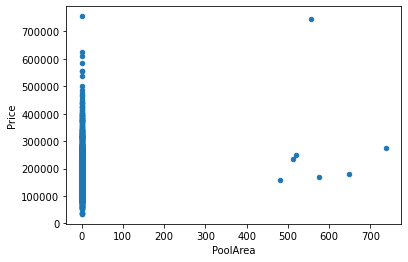

In [69]:
df[['PoolArea', 'Price']].plot.scatter(x='PoolArea', y='Price')

In [76]:
df['Heating'].unique()

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object)

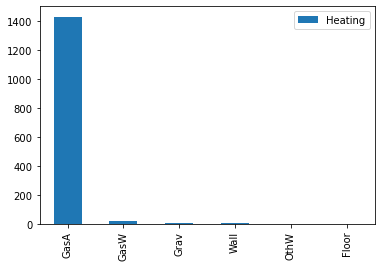

In [84]:
pd.DataFrame(df['Heating'].value_counts()).plot.bar()

### 1.3.5 visualization


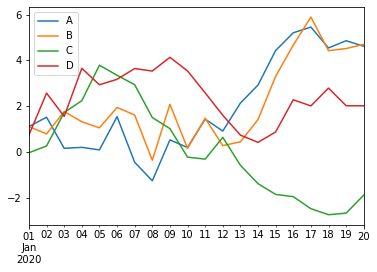

In [15]:
%matplotlib inline
df = pd.DataFrame(np.random.randn(20,4), columns=list('ABCD'))
idx = pd.date_range('2020-01-01', periods=len(df))
df.index = idx
df.cumsum().plot()


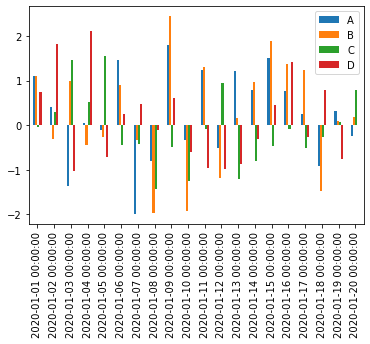

In [16]:
df.plot.bar()

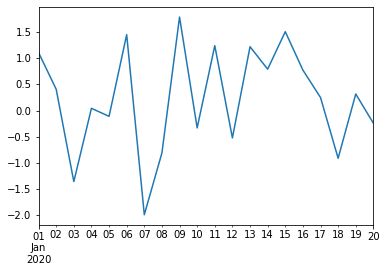

In [17]:
df['A'].plot()

<u> Homework </u> <br>

<p> 1. Read <a href="https://pandas.pydata.org/docs/user_guide/index.html"> pandas online manual </a> and understand the usage of different functions related to DataFrame</p>
<p> 2. Try all examples in https://pandas.pydata.org/docs/user_guide/10min.html.</p>


